In [1]:
import pandas as pd
import numpy as np
from glob import glob

In [2]:
from typing import Union

import numpy as np
from sklearn.metrics import average_precision_score, mean_squared_error

def rmse(y_true: Union[np.ndarray, list], y_pred: Union[np.ndarray, list]) -> float:
    return np.sqrt(mean_squared_error(y_true, y_pred))


def rmsle(y_true: Union[np.ndarray, list], y_pred: Union[np.ndarray, list]) -> float:
    return rmse(np.log1p(y_true), np.log1p(y_pred))

In [3]:
y = pd.read_feather("../input/train.ftr")["Global_Sales"]

In [4]:
y

0       306
1       234
2       128
3       125
4       124
       ... 
8354      4
8355      1
8356      1
8357      4
8358      1
Name: Global_Sales, Length: 8359, dtype: int16

In [5]:
np.sort(glob("../output/010_seed_average_008/*/oof_preds.npy"))

array(['../output/010_seed_average_008/seed_000/oof_preds.npy',
       '../output/010_seed_average_008/seed_001/oof_preds.npy',
       '../output/010_seed_average_008/seed_002/oof_preds.npy',
       '../output/010_seed_average_008/seed_003/oof_preds.npy',
       '../output/010_seed_average_008/seed_004/oof_preds.npy',
       '../output/010_seed_average_008/seed_005/oof_preds.npy',
       '../output/010_seed_average_008/seed_006/oof_preds.npy',
       '../output/010_seed_average_008/seed_007/oof_preds.npy',
       '../output/010_seed_average_008/seed_008/oof_preds.npy',
       '../output/010_seed_average_008/seed_009/oof_preds.npy',
       '../output/010_seed_average_008/seed_010/oof_preds.npy',
       '../output/010_seed_average_008/seed_011/oof_preds.npy',
       '../output/010_seed_average_008/seed_012/oof_preds.npy',
       '../output/010_seed_average_008/seed_013/oof_preds.npy',
       '../output/010_seed_average_008/seed_014/oof_preds.npy',
       '../output/010_seed_average_008/s

In [6]:
np.sort(glob("../output/010_seed_average_008/*/test_preds.npy"))

array(['../output/010_seed_average_008/seed_000/test_preds.npy',
       '../output/010_seed_average_008/seed_001/test_preds.npy',
       '../output/010_seed_average_008/seed_002/test_preds.npy',
       '../output/010_seed_average_008/seed_003/test_preds.npy',
       '../output/010_seed_average_008/seed_004/test_preds.npy',
       '../output/010_seed_average_008/seed_005/test_preds.npy',
       '../output/010_seed_average_008/seed_006/test_preds.npy',
       '../output/010_seed_average_008/seed_007/test_preds.npy',
       '../output/010_seed_average_008/seed_008/test_preds.npy',
       '../output/010_seed_average_008/seed_009/test_preds.npy',
       '../output/010_seed_average_008/seed_010/test_preds.npy',
       '../output/010_seed_average_008/seed_011/test_preds.npy',
       '../output/010_seed_average_008/seed_012/test_preds.npy',
       '../output/010_seed_average_008/seed_013/test_preds.npy',
       '../output/010_seed_average_008/seed_014/test_preds.npy',
       '../output/010_see

In [7]:
oof_preds = []
for oof_pred in np.sort(glob("../output/010_seed_average_008/*/oof_preds.npy")):
    oof_preds.append(np.load(oof_pred))

In [8]:
oof_preds

[array([32.03978277, 21.38717125, 18.78559914, ...,  3.76160891,
        27.34310966, 21.95093593]),
 array([26.66038828, 19.7219889 , 16.70970166, ...,  3.96185873,
        26.30084536, 18.03832945]),
 array([32.25696952, 20.0791427 , 19.16093353, ...,  3.20713696,
        29.4965192 , 22.17565024]),
 array([33.6493438 , 18.74510527, 20.72622507, ...,  3.75980874,
        27.78907804, 21.002556  ]),
 array([29.73011564, 19.89259139, 20.70191371, ...,  2.89508252,
        30.7445556 , 23.94191284]),
 array([31.73044901, 21.58264158, 19.59213114, ...,  3.49601778,
        28.74515024, 21.28613655]),
 array([28.02952893, 22.14534058, 18.96563121, ...,  3.49951364,
        28.76085562, 22.09648922]),
 array([29.45391948, 19.39281219, 21.06659028, ...,  3.91209043,
        26.51391895, 21.35164626]),
 array([30.89892583, 21.40893755, 19.41995548, ...,  3.97150421,
        25.0523008 , 21.19717119]),
 array([27.29700007, 20.28336329, 17.06723703, ...,  3.41126027,
        23.82158881, 18.20

In [9]:
for oof_pred in oof_preds:
    print(rmsle(y, oof_pred))

1.1009925633330786
1.097012486577531
1.1030926148007487
1.0929045591710704
1.0945839317872383
1.0876854998106282
1.096651101123802
1.0947605109412206
1.0992665757330702
1.0929367898736133
1.0922079985507385
1.096806933536515
1.0960067042463235
1.0986601045415247
1.0941395986871263
1.0905789806554027
1.0944688729806282
1.0957764731973858
1.0939007859764756
1.104045356215245
1.0934297141340197
1.0976793147662138
1.099437523726636
1.0972678051363765
1.0986528029799318
1.0939408243022959
1.0945391511476266
1.1012822859277178
1.0916860958852321
1.0948809318292245
1.099408501016868
1.0960011235638731
1.1026420213715258
1.092118558693833
1.098160910966783
1.088962448871649
1.0989390934406542
1.1103424843914722
1.0974688587353558
1.0992189968951014
1.1018117074414198
1.0918629096087877
1.0981776285588047
1.0917894998595383
1.0901349732646985
1.0999392121475582
1.0971918865699664
1.0918286632082195
1.098020605601011
1.0950027291282844
1.0955820301293482
1.106224568368647
1.0927670246538752
1.10

In [10]:
rmsle(y, np.mean(oof_preds, axis=0))

1.0930989647880016

In [11]:
test_preds = []
for test_pred in np.sort(glob("../output/010_seed_average_008/*/test_preds.npy")):
    test_preds.append(np.load(test_pred))

In [12]:
test_preds

[array([22.08506578, 63.97799035, 28.81483062, ...,  2.44705311,
         3.75896124, 12.92874477]),
 array([20.39779574, 66.67941012, 26.43313704, ...,  2.54592311,
         3.642027  , 12.41433615]),
 array([21.37293528, 65.65401886, 29.04607254, ...,  2.60321288,
         3.89633969, 11.75288933]),
 array([20.46835515, 66.80416368, 28.67470941, ...,  2.57163552,
         4.02621765, 13.52549277]),
 array([20.3028247 , 66.51286968, 26.84111338, ...,  2.20307682,
         3.72324083, 12.69118762]),
 array([20.51923521, 69.22181626, 27.84065626, ...,  2.68666619,
         3.58798307, 12.19518808]),
 array([22.35478103, 70.127809  , 27.58008446, ...,  2.47107472,
         3.67006315, 11.89755247]),
 array([21.3542803 , 69.49650541, 27.66277448, ...,  2.45741539,
         3.37244012, 13.10001458]),
 array([20.63331367, 63.80472344, 29.24823318, ...,  2.41340473,
         3.64410801, 12.4012438 ]),
 array([21.52852343, 67.42814675, 23.61534808, ...,  2.40018913,
         3.60059042, 12.38

In [13]:
sample_submission = pd.read_csv("../input/sample_submission.csv")

In [14]:
sample_submission

,Global_Sales
0,63.371815
1,63.371815
2,63.371815
3,63.371815
4,63.371815
...,...
8355,63.371815
8356,63.371815
8357,63.371815
8358,63.371815


In [15]:
sample_submission["Global_Sales"]=np.mean(test_preds, axis=0)

In [16]:
sample_submission.to_csv("../output/010_seed_average_008/average_submission.csv", index=False)

https://www.kaggle.com/hsperr/finding-ensamble-weights

In [17]:
def loss_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    for weight, oof_pred in zip(weights, oof_preds):
            final_prediction += weight*oof_pred

    return rmsle(y, final_prediction)

In [18]:
starting_values = [0.5]*len(oof_preds)

In [19]:
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})

In [20]:
from scipy.optimize import minimize

In [21]:
bounds = [(0,1)]*len(oof_preds)

In [22]:
res = minimize(loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

In [23]:
res["fun"]

1.0830302719347416

<AxesSubplot:>

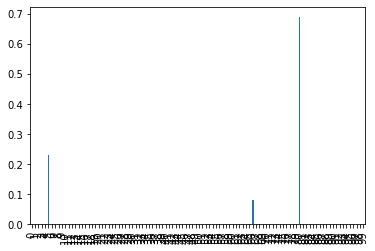

In [24]:
pd.Series(res["x"]).plot.bar()

In [25]:
final_prediction = 0
for weight, test_pred in zip(res["x"], test_preds):
        final_prediction += weight*test_pred

In [26]:
final_prediction

array([22.14813616, 69.45012859, 28.67223035, ...,  2.58720848,
        3.78307587, 13.19283139])

In [27]:
sample_submission["Global_Sales"]=final_prediction

In [28]:
sample_submission.to_csv("../output/010_seed_average_008/slsqp_weight_average_submission.csv", index=False)